# Predict Vehicle Prices using Vehicle dataset

Objective : Build a system that can predict the prices for vehicles using data on Vehicle specifications,
make, etc. Explore the data to understand the features and figure out an approach.

In [15]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [16]:
data = pd.read_csv(r'E:\DATA-SCIENCE\UnifiedMentor\Selected_project\VehiclePrice\dataset.csv')

In [17]:
data.head(6)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
5,2024 Nissan Murano Platinum,\n \n Boasts 28 Highway MPG and 20...,Nissan,Murano,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive


In [6]:
data.tail(5)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive
1001,2024 Chevrolet Silverado 2500 WT,01u 2024 Chevrolet Silverado 2500HD Work Truck...,Chevrolet,Silverado 2500,2024,48995.0,"8 gasoline direct injection, variable valve co...",8.0,Gasoline,31.0,Automatic,WT,Pickup Truck,4.0,Wheatland Yellow,Jet Black,Rear-wheel Drive


In [7]:
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


**Data Preprocessing**

In [3]:
data.shape

(1002, 17)

In [4]:
data.isna().sum() #missing value present in dataset

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [18]:
#as the small amout the missing value present so,drop it 
data.dropna(inplace=True)

In [19]:
data.shape

(750, 17)

In [7]:
data.isna().sum()

name              0
description       0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
log_price         0
dtype: int64

**Feature Engineering and Data Analysis**

In [19]:
data.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

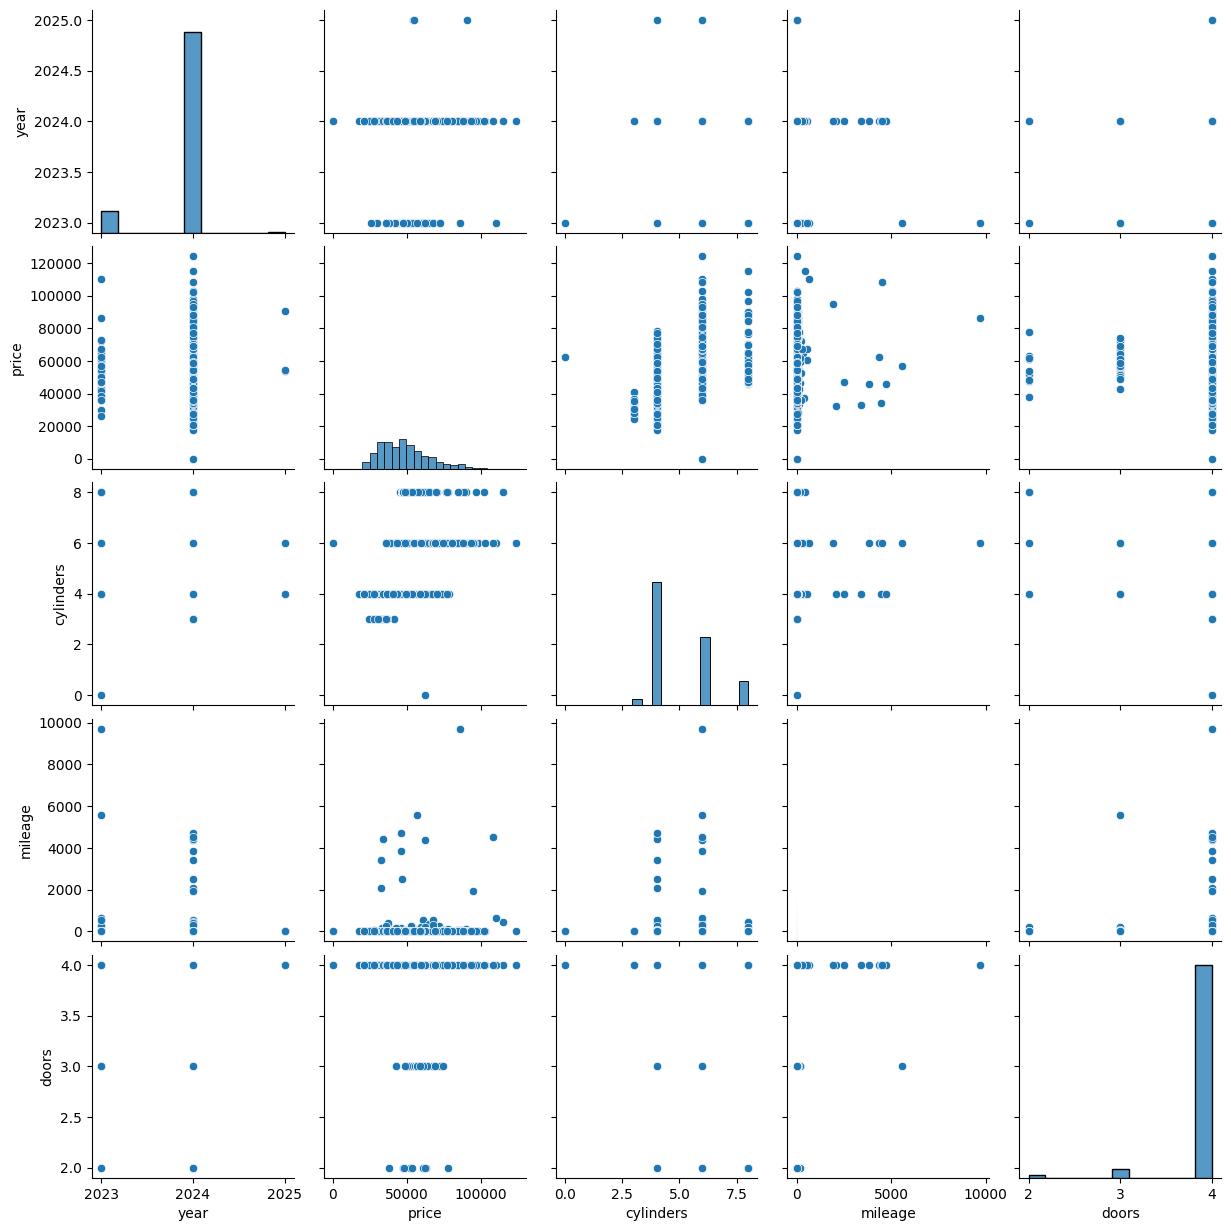

In [9]:
#See the Distribution plot for Price,mileage,year 
sns.pairplot(data)

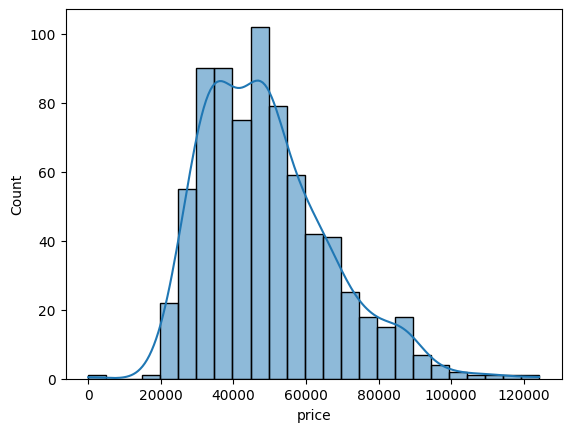

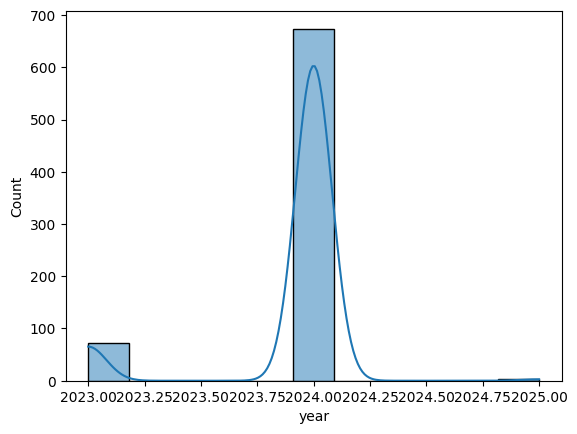

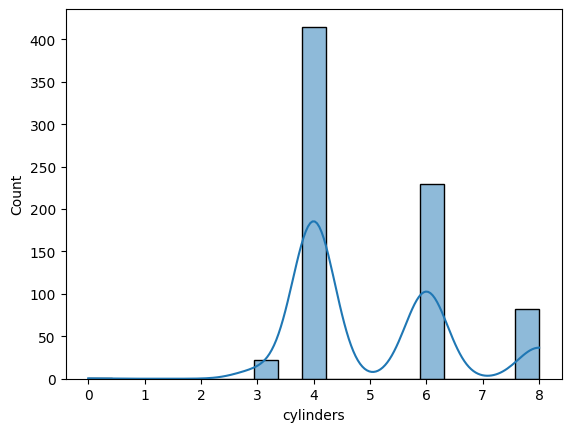

In [16]:
#Distribution of numerical veriable 
num_feature = ['price','year','cylinders']
for i in num_feature:
    sns.histplot(data[i],kde=True)
    plt.show()

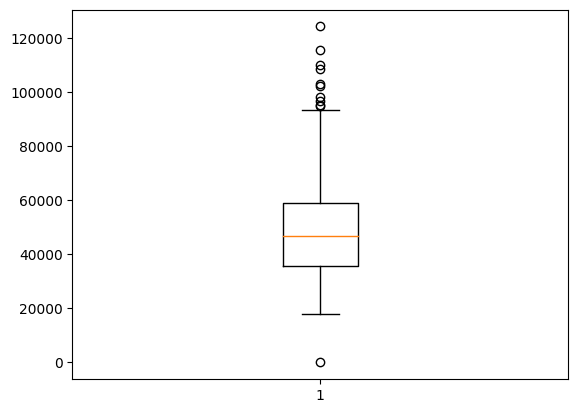

In [18]:
#box plot for detect the outliers in price 
plt.boxplot(data['price']);  
#here we can see some price are fair frpm median value and outof box plot but some vehicle has 0 price value, we'll drop it

In [7]:
#Outliers Detection
z_score = np.abs(stats.zscore(data['price']))
out = data[z_score>3]
print(len(out))  #there are 6 value but they are higher price value of expensive cars so we should not avoid it
#Another method : IQR 
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
IQR = q3-q1
lower_bond = q1-1.5*IQR 
upper_bond = q3+1.5*IQR
out_iqr = data[(data['price'] < lower_bond) | (data['price'] > upper_bond)] 
print(len(out_iqr))
out_iqr_df = out_iqr.copy()
out_iqr_df
#here we can see the price of AUDI index number : 94 has 0 price we'll drop it simple

6
11


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
94,2024 Audi SQ5 Premium Plus,\n \n Ultra Blue Metallic 2024 Aud...,Audi,SQ5,2024,0.0,oled Turbo Premium Unleaded V-6 3.0 L/183,6.0,Gasoline,14.0,Automatic,Premium Plus,SUV,4.0,Ultra Blue Metallic,Black,All-wheel Drive
405,2024 Mercedes-Benz GLS 450 4MATIC,"\n \n Pinnacle Trim Package,Catala...",Mercedes-Benz,GLS 450,2024,98180.0,24V GDI DOHC Turbo,6.0,Gasoline,5.0,9-Speed Automatic,4MATIC,SUV,4.0,Polar White,Beige / Black,All-wheel Drive
450,2024 BMW X7 M60i,2024 BMW X7 M60i,BMW,X7,2024,115445.0,32V GDI DOHC Twin Turbo,8.0,Gasoline,447.0,8-Speed Automatic,M60i,SUV,4.0,Mineral White Metallic,Black,All-wheel Drive
538,2024 BMW 740 i,With the largest new and Certified Pre-Owned B...,BMW,740,2024,103045.0,24V GDI DOHC Turbo,6.0,Gasoline,19.0,8-Speed Automatic,i,Sedan,4.0,Black Sapphire Metallic,Black,Rear-wheel Drive
611,2024 Jeep Grand Wagoneer Series III,"All prices plus tax, tag, title,dealer fee, de...",Jeep,Grand Wagoneer,2024,124250.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,8-Speed Automatic,Series III,SUV,4.0,Midnight Sky,Global Black,Four-wheel Drive
697,2024 Mercedes-Benz GLS 450 4MATIC,\n \n Recent Arrival! Doggett Merc...,Mercedes-Benz,GLS 450,2024,95230.0,24V GDI DOHC Turbo,6.0,Gasoline,8.0,9-Speed Automatic,4MATIC,SUV,4.0,Polar White,Macchiato Beige,All-wheel Drive
720,2024 GMC Sierra 3500 Denali,"\n \n Nav System, Heated/Cooled Le...",GMC,Sierra 3500,2024,102287.0,32V DDI OHV Turbo Diesel,8.0,Diesel,4.0,10-Speed Automatic,Denali,Pickup Truck,4.0,Summit White,Jet Black,Four-wheel Drive
734,2023 Jeep Grand Wagoneer Series II,\n \n .\n \n,Jeep,Grand Wagoneer,2023,110150.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,650.0,8-Speed Automatic,Series II,SUV,4.0,Midnight Sky,Global Black,Four-wheel Drive
769,2024 GMC Sierra 2500 Denali Ultimate,New vehicle pricing may reflect rebates or fac...,GMC,Sierra 2500,2024,96860.0,32V DDI OHV Turbo Diesel,8.0,Diesel,0.0,10-Speed Automatic,Denali Ultimate,Pickup Truck,4.0,White Frost Tri-Coat,Alpine Umber,Four-wheel Drive
829,2024 Jeep Grand Wagoneer Series III,"All prices plus tax, tag, title,dealer fee, de...",Jeep,Grand Wagoneer,2024,108537.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,4501.0,8-Speed Automatic,Series III,SUV,4.0,Bright White Clearcoat,Tupelo,Four-wheel Drive


In [20]:
#Drop the raw with value Zero(0)
price_zero = data[data['price'] == 0].index
data.drop(price_zero,inplace=True)
#Check if price with 0 exist or not 
print(data[data['price'] == 0]) #return empty dataframe

Empty DataFrame
Columns: [name, description, make, model, year, price, engine, cylinders, fuel, mileage, transmission, trim, body, doors, exterior_color, interior_color, drivetrain]
Index: []


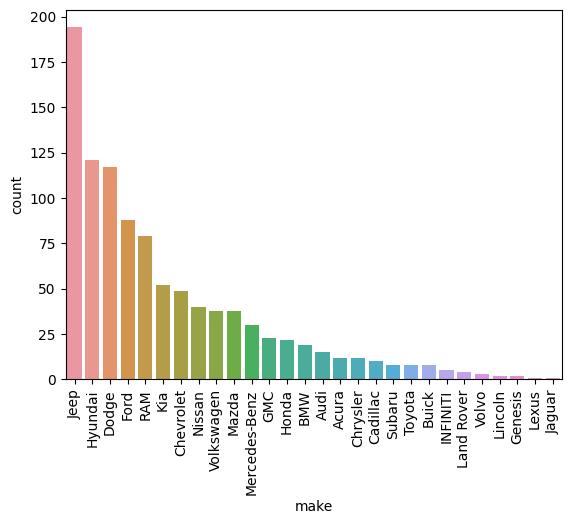

In [45]:
#Count plot for make 
sns.countplot(x='make',data=data,order=data['make'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

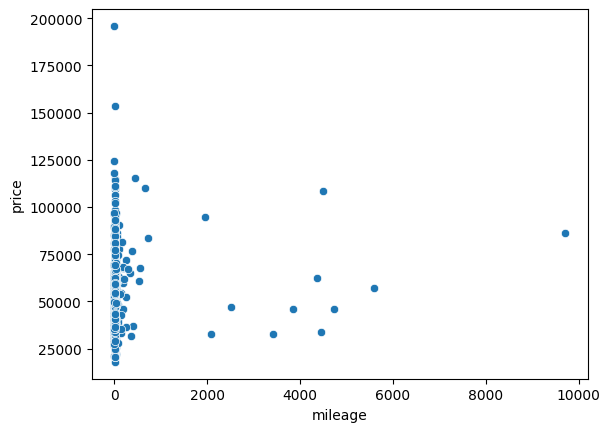

In [46]:
#Relationship between mileage and price 
sns.scatterplot(x='mileage',y='price',data=data)
plt.show()

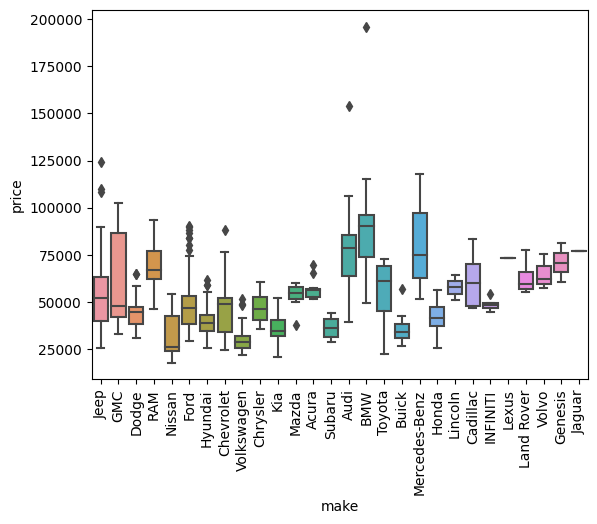

In [47]:
#Price Distribution for makers 
sns.boxplot(x='make',y='price',data=data)
plt.xticks(rotation=90)
plt.show()

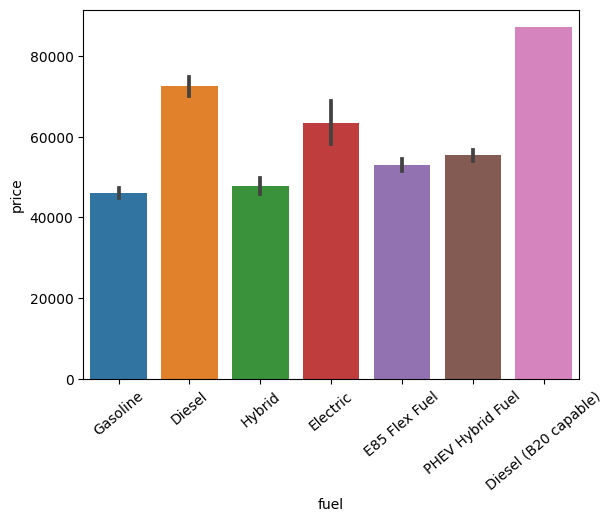

In [50]:
#Average price for fuel 
sns.barplot(x='fuel',y='price',data=data)
plt.xticks(rotation=40)
plt.show()

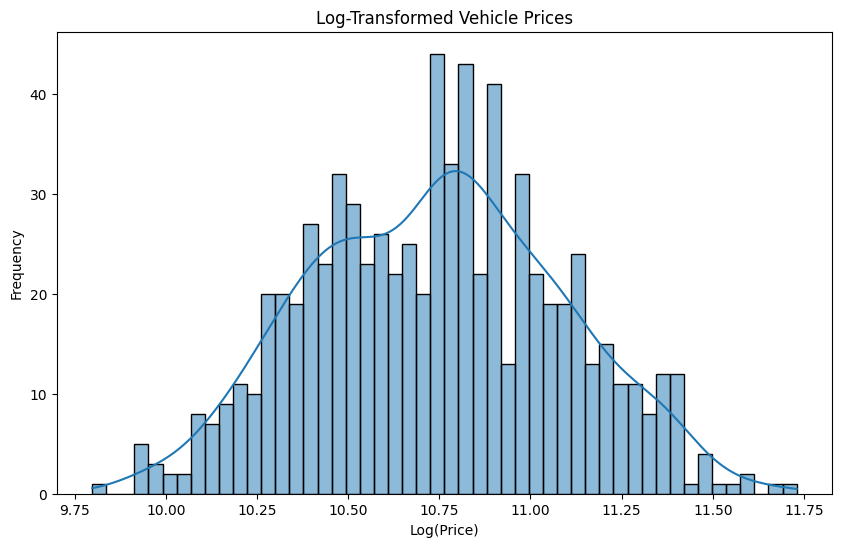

In [21]:
#Now we have some price value with upper bond so for health model we will make the price normally distribute :
#Handle the Skewness of price with Log Transformation 
data['log_price']  = np.log(data['price'])
plt.figure(figsize=(10,6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Log-Transformed Vehicle Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

In [10]:
data['log_price'].skew() #here price with log is around 0 so it's better for model

0.0459087321299775

In [9]:
data['log_price'].mean()

10.741694058074991

In [10]:
data['log_price'].std()

0.34491838670666664

In [12]:
data.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain', 'log_price'],
      dtype='object')

**Feature Trasnformation**

In [22]:
#Drop the Feature like : name,description 
data.drop(columns=['name','description'],axis=1,inplace=True)

In [23]:
#Label Encoding for : model,engine, fuel, transmission, trim, body, exterior_color, interior_color, drivetrain
la_incode = ['model','engine','fuel','transmission','trim','body','exterior_color','interior_color','drivetrain']
le = LabelEncoder()
for encode in la_incode:
    data[encode] = le.fit_transform(data[encode]) 

In [24]:
#One-Hot Encoding for make (company name)
data = pd.get_dummies(data,columns=['make'],dtype=int)
data.head(5)

,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,...,make_Lexus,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Nissan,make_RAM,make_Subaru,make_Toyota,make_Volkswagen,make_Volvo
0,108,2024,74600.0,22,6.0,3,10.0,13,125,6,...,0,0,0,0,0,0,0,0,0,0
1,44,2024,50170.0,59,6.0,3,1.0,13,70,6,...,0,0,0,0,0,0,0,0,0,0
3,26,2023,46835.0,12,8.0,3,32.0,13,91,6,...,0,0,0,0,0,0,0,0,0,0
4,2,2024,81663.0,18,6.0,0,10.0,5,67,5,...,0,0,0,0,0,1,0,0,0,0
5,58,2024,46000.0,24,6.0,3,3838.0,27,84,6,...,0,0,0,0,1,0,0,0,0,0


In [14]:
data.iloc[:,:14]

,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,108,2024,74600.0,22,6.0,3,10.0,13,125,6,4.0,216,31,1
1,44,2024,50170.0,59,6.0,3,1.0,13,70,6,4.0,121,31,1
3,26,2023,46835.0,12,8.0,3,32.0,13,91,6,4.0,218,5,0
4,2,2024,81663.0,18,6.0,0,10.0,5,67,5,4.0,178,5,1
5,58,2024,46000.0,24,6.0,3,3838.0,27,84,6,4.0,216,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,91,2024,59037.0,5,4.0,0,10.0,22,132,0,3.0,10,5,3
998,49,2024,49720.0,35,4.0,3,0.0,3,58,6,4.0,4,5,0
999,108,2024,69085.0,22,6.0,3,20.0,13,34,6,4.0,69,5,1
1000,58,2024,43495.0,41,6.0,3,6.0,26,116,6,4.0,144,32,0


In [25]:
#As we can see some feature are unnecessory float value, convert into int value 
float_feature = ['cylinders','mileage','doors']
for i in float_feature:
    data[i] = data[i].astype(int)

In [35]:
data.iloc[:,:14]

,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,108,2024,74600.0,22,6,3,10,13,125,6,4,216,31,1
1,44,2024,50170.0,59,6,3,1,13,70,6,4,121,31,1
3,26,2023,46835.0,12,8,3,32,13,91,6,4,218,5,0
4,2,2024,81663.0,18,6,0,10,5,67,5,4,178,5,1
5,58,2024,46000.0,24,6,3,3838,27,84,6,4,216,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,91,2024,59037.0,5,4,0,10,22,132,0,3,10,5,3
998,49,2024,49720.0,35,4,3,0,3,58,6,4,4,5,0
999,108,2024,69085.0,22,6,3,20,13,34,6,4,69,5,1
1000,58,2024,43495.0,41,6,3,6,26,116,6,4,144,32,0


In [ ]:
#As we can see all are in numerical exepet the price bcoz we'll drop it later as we work on log_price

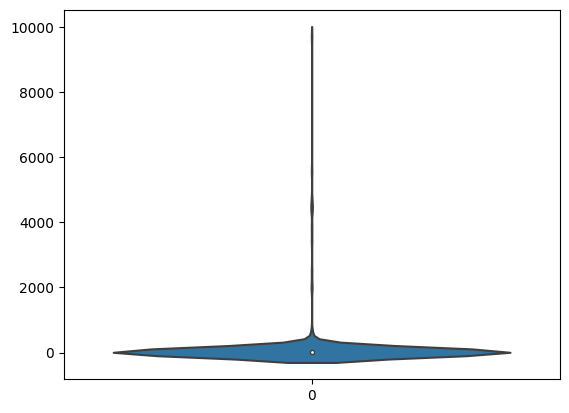

In [15]:
#Some data points in mileage detected as outliers  
sns.violinplot(data['mileage']);

In [59]:
#Let work on outliers data points that presents in mileage  
min_value_mileage = data['mileage'].min()
max_value_mileage = data['mileage'].max()
std_value_mileage = data['mileage'].std()
mean_value_mileage = data['mileage'].mean()
print(f'Min value:{min_value_mileage},Max value:{max_value_mileage},Std value:{std_value_mileage},Mean Value:{mean_value_mileage}')

Min value:0,Max value:9711,Std value:572.2170942521594,Mean Value:80.3004005340454


In [26]:
data_cleaned = data[(data['mileage'] >=1) & (data['mileage'] <= 100)]

In [32]:
data_cleaned

,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,...,make_Lexus,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Nissan,make_RAM,make_Subaru,make_Toyota,make_Volkswagen,make_Volvo
0,108,2024,74600.0,22,6,3,10,13,125,6,...,0,0,0,0,0,0,0,0,0,0
1,44,2024,50170.0,59,6,3,1,13,70,6,...,0,0,0,0,0,0,0,0,0,0
3,26,2023,46835.0,12,8,3,32,13,91,6,...,0,0,0,0,0,0,0,0,0,0
4,2,2024,81663.0,18,6,0,10,5,67,5,...,0,0,0,0,0,1,0,0,0,0
6,108,2024,63862.0,22,6,3,5,13,34,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,46,2024,59674.0,63,6,3,8,26,74,6,...,0,0,0,0,0,0,0,0,0,0
997,91,2024,59037.0,5,4,0,10,22,132,0,...,0,0,0,1,0,0,0,0,0,0
999,108,2024,69085.0,22,6,3,20,13,34,6,...,0,0,0,0,0,0,0,0,0,0
1000,58,2024,43495.0,41,6,3,6,26,116,6,...,0,0,0,0,1,0,0,0,0,0


<Axes: >

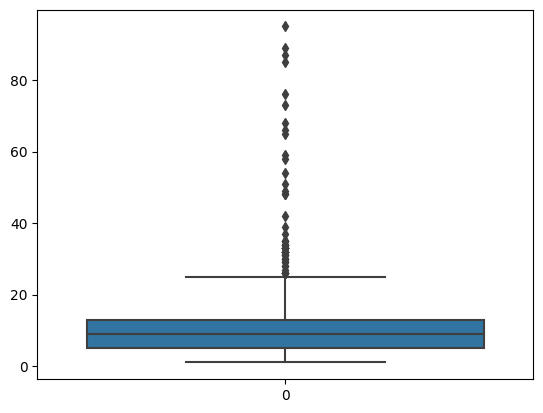

In [69]:
sns.boxplot(data_cleaned['mileage'])

**Model Development**

In [27]:
X = data_cleaned.drop(['price','log_price'],axis=1)
y = data_cleaned['log_price']

In [28]:
#Split the data for train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [62]:
#================================Model-1 Linear Regression================================== 
LR_model1 = LinearRegression().fit(x_train,y_train)
pred_LR_model1 = LR_model1.predict(x_test)

In [21]:
pred_log_price = np.exp(pred_LR_model1) #Conver the log_price back to orignal price

In [22]:
r2_model1 = r2_score(y_test,pred_LR_model1)
print(f"R-Squared:{r2_model1*100:.2f}%")
mae_model1 = mean_absolute_error(np.exp(y_test),pred_log_price)
mse_model1 = mean_squared_error(np.exp(y_test),pred_log_price)
rmse_model1 = np.sqrt(mse_model1)
print(f"Mean absolute Error:{mae_model1:.2f}")
print(f"Mean squared Error:{mse_model1:.2f}")
print(f"Root Mean squared Error:{rmse_model1:.2f}")

R-Squared:72.85%
Mean absolute Error:6257.92
Mean squared Error:78562834.89
Root Mean squared Error:8863.57


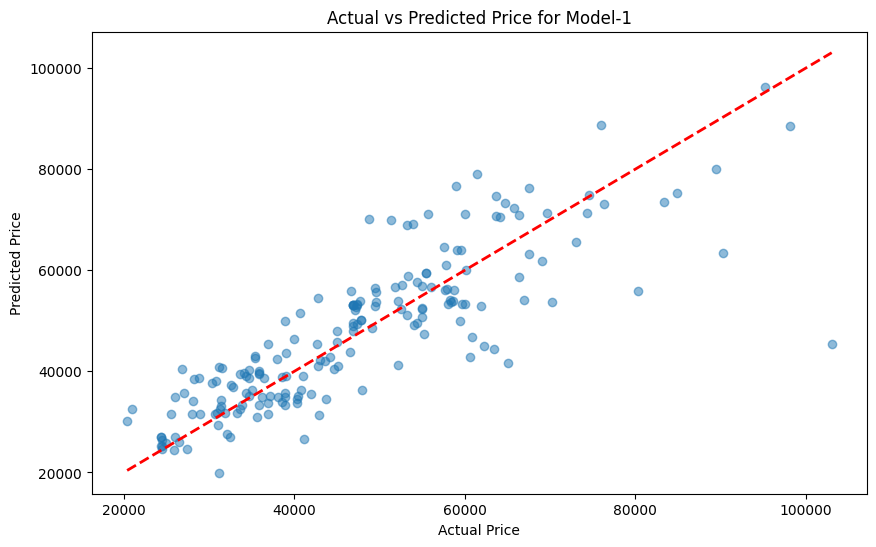

In [23]:
#Scatter plot fot Actual vs predicted values : model-1 
plt.figure(figsize=(10,6))
plt.scatter(np.exp(y_test),np.exp(pred_LR_model1),alpha=0.5)
plt.plot([np.exp(y_test.min()),np.exp(y_test.max())],[np.exp(y_test.min()),np.exp(y_test.max())],color='red',linestyle='--',linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price for Model-1')
plt.show()

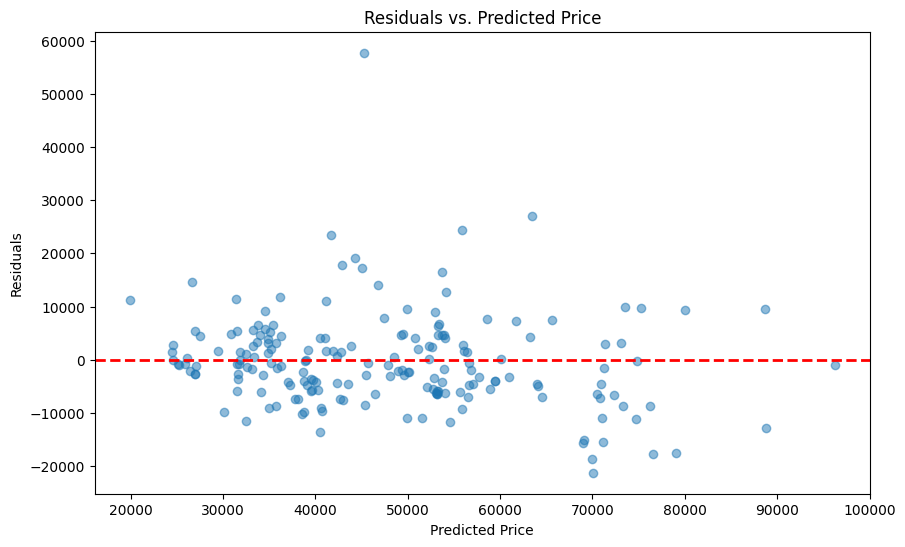

In [94]:
residuals = np.exp(y_test) - np.exp(pred_LR_model1)
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(pred_LR_model1), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Price')
plt.show()

In [24]:
LR_model1.coef_

array([ 3.60046846e-03,  1.63890202e-01,  1.36160322e-05,  1.10422680e-01,
       -5.48195147e-03,  8.19067146e-04, -3.79943007e-03,  5.02612420e-04,
       -3.45715234e-03,  1.71883920e-01,  3.79514659e-04,  1.89480396e-03,
       -5.13268178e-02,  3.13736521e-01,  9.11642689e-02, -6.46815581e-02,
       -1.49261838e-01, -3.30021691e-01, -1.60081656e-01, -9.32993241e-02,
        7.09548549e-02,  1.29475456e-02, -1.97979629e-01, -3.22676158e-01,
        3.06318104e-02,  2.72415038e-02, -3.41066624e-01,  4.51386986e-01,
        4.06082260e-01,  1.80506621e-01,  3.21961566e-01,  5.35121387e-01,
       -4.60478888e-01,  4.73097581e-01, -4.39042325e-01, -5.07987012e-02,
       -4.94391125e-01,  1.88946612e-01])

In [43]:
#Let Try to improve the model performance with some techniques  
#----------------------------Feature Engineering-------------------------
# #Polinomial : use for non-linear Relationship between feature 
# X_poly = X.copy()
# scale = StandardScaler()
# X_scale_poly = scale.fit_transform(X_poly)
# poly = PolynomialFeatures(degree=2,include_bias=False)
# poly_LR = poly.fit_transform(X_scale_poly)

# poly_feature = poly.get_feature_names_out(X_poly.columns)
# poly_df = pd.DataFrame(poly_LR,columns=poly_feature)

# for i in poly_feature:
#     poly_df[i] = poly_df[i].astype(int)
# poly_x_train,poly_x_test,poly_y_train,poly_y_test = train_test_split(poly_df,y,test_size=0.3,random_state=42)

# from sklearn.linear_model import Ridge
# ridge_poly = Ridge(alpha=0.1)
# ridge_poly.fit(poly_x_train,poly_y_train)

# pred_poly = ridge_poly.predict(poly_x_test)
# pred_poly_logprice = np.exp(pred_poly)
# #LR_poly_model = LinearRegression()
# #LR_poly_model.fit(poly_x_train,poly_y_train)

# #pred_poly = LR_poly_model.predict(poly_x_test)
# #pred_poly_logprice = np.exp(pred_poly)

# r2_poly = r2_score(np.exp(poly_y_test),pred_poly_logprice)
# mae_poly = mean_absolute_error(np.exp(poly_y_test),pred_poly_logprice)

# print(f'R2-score for polynomial:{r2_poly*100:.2f}%')
# print(f'MAE for polynomial:{mae_poly:.2f}')


R2-score for polynomial:-58550.97%
MAE for polynomial:47477.34


In [50]:
#-----------------------Hyper Parameter Tuning-----------------------------
#We use Ridge and Lasso because : Ridge L2 penalty for reduce the size of coefficients,
                                 # Lasso L1 penalty for shrink some coefficients to Zero(0)
hp_x_train,hp_x_test,hp_y_train,hp_y_test = train_test_split(X,y,test_size=0.3,random_state=42)

ridge = Ridge() 
lasso = Lasso()

#hyper parameter for lasso & ridge
ridge_para = {'alpha': [0.01,0.1,1,10,100,1000]}
lasso_para = {'alpha' : [0.01,0.1,1,10,100,1000]}
   
ridge_grid = GridSearchCV(ridge,ridge_para,cv=5)    
lasso_grid = GridSearchCV(lasso,lasso_para,cv=5)

#fit the ridge and lasso model 
ridge_grid.fit(hp_x_train,hp_y_train)
lasso_grid.fit(hp_x_train,hp_y_train)

#now predict on the test data
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_

pred_ridge = ridge_best.predict(hp_x_test)
pred_lasso = lasso_best.predict(hp_x_test)

#get back the orinal price
pred_ridge_logprice = np.exp(pred_ridge)
pred_lasso_logprice = np.exp(pred_lasso)

r2_ridge = r2_score(np.exp(hp_y_test),pred_ridge_logprice)
mae_ridge = mean_absolute_error(np.exp(hp_y_test),pred_ridge_logprice)

r2_lasso = r2_score(np.exp(hp_y_test),pred_lasso_logprice)
mae_lasso = mean_absolute_error(np.exp(hp_y_test),pred_lasso_logprice)

print(f'R2 Score for Ridge: {r2_ridge*100:.2f}%')
print(f'Mean Absolute Error for Ridge: {mae_ridge:.2f}')
print(f'R2 Score for Lasso: {r2_lasso*100:.2f}%')
print(f'Mean Absolute Error for Lasso: {mae_lasso:.2f}')

#We get the approx same result even after hyper parameter tuning  

R2 Score for Ridge: 69.26%
Mean Absolute Error for Ridge: 6249.87
R2 Score for Lasso: 37.66%
Mean Absolute Error for Lasso: 9139.99


In [35]:
#-----------------------------RandomForestRegressor---------------------------------
#RandoForest is Robust to handle the non-linear realationship 
#Let make a model and check it's really helpful for us or not?

#Already has a split data for train and test
RF_model = RandomForestRegressor()
RF_model.fit(x_train,y_train)

pred_RF = RF_model.predict(x_test)
#Get back the value from log
pred_RF_log = np.exp(pred_RF)

#r2Score for RandomForest Regressor
r2_score_RF = r2_score(np.exp(y_test),pred_RF_log)
mae_RF = mean_absolute_error(np.exp(y_test),pred_RF_log)
print(f'R2 Score for RandomForesrRegressor: {r2_score_RF*100:.2f}%')
print(f'Mean Absolute Error for RandomForestRegressor : {mae_RF:.2f}')

#Wow.. it's great than other model 80.57 % 

R2 Score for RandomForesrRegressor: 80.57%
Mean Absolute Error for RandomForestRegressor : 4000.08


In [68]:
#-----------------------------XGBRegressor---------------------------------
#XGB is to more powerful by boosting the weak learners features  
#Let make a model and check it's really helpful for us or not?

#Already has a split data for train and test
XGB_model = XGBRegressor()
XGB_model.fit(x_train,y_train)

pred_XGB = XGB_model.predict(x_test)
#Get back the value from log
pred_XGB_log = np.exp(pred_XGB)

#r2Score for XGB Regressor
r2_score_XGB = r2_score(np.exp(y_test),pred_XGB_log)
mae_XGB = mean_absolute_error(np.exp(y_test),pred_XGB_log)
rmse_XGB = np.sqrt(mean_squared_error(np.exp(y_test),pred_XGB_log))
print(f'R2 Score for XGB Regressor: {r2_score_XGB*100:.2f}%')
print(f'Mean Absolute Error for XGB Regressor : {mae_XGB:.2f}')
print(f'Root Mean squeared Error : {rmse_XGB:.2f}')
#Wow.. it's great than other model 85.61 % 

R2 Score for XGB Regressor: 85.61%
Mean Absolute Error for XGB Regressor : 3373.26
Root Mean squeared Error : 6054.71


In [36]:
x_train.columns

Index(['model', 'year', 'engine', 'cylinders', 'fuel', 'mileage',
       'transmission', 'trim', 'body', 'doors', 'exterior_color',
       'interior_color', 'drivetrain', 'make_Audi', 'make_BMW', 'make_Buick',
       'make_Cadillac', 'make_Chevrolet', 'make_Chrysler', 'make_Dodge',
       'make_Ford', 'make_GMC', 'make_Honda', 'make_Hyundai', 'make_INFINITI',
       'make_Jeep', 'make_Kia', 'make_Land Rover', 'make_Lexus',
       'make_Lincoln', 'make_Mazda', 'make_Mercedes-Benz', 'make_Nissan',
       'make_RAM', 'make_Subaru', 'make_Toyota', 'make_Volkswagen',
       'make_Volvo'],
      dtype='object')

In [69]:
#==================================**USER PREDICTION ON UNSEEN DATA**================================
# Initialize the LabelEncoders for categorical features
label_encoders = {
    'model': LabelEncoder(), 
    'engine': LabelEncoder(),
    'fuel': LabelEncoder(),
    'transmission': LabelEncoder(),
    'trim': LabelEncoder(),
    'body': LabelEncoder(),
    'exterior_color': LabelEncoder(),
    'interior_color': LabelEncoder(),
    'drivetrain': LabelEncoder()
}

# Fit the LabelEncoders with the training data   #train_data = data_cleaned 
def fit_label_encoders(train_data):
    for feature, le in label_encoders.items():
        le.fit(train_data[feature])              #encode the data

#Prepare user input for prediction             
def prepare_input_for_prediction(user_input):
    # Create a DataFrame from user input
    input_df = pd.DataFrame([user_input])
    
    # Apply Label Encoding to categorical features
    for feature in label_encoders:
        if feature in input_df.columns:
            # Handle unseen values by assigning a default value
            if not set(input_df[feature]).issubset(set(label_encoders[feature].classes_)):
                # Assign a default value (e.g., -1 for unseen categories)
                input_df[feature] = input_df[feature].apply(lambda x: -1)
            else:
                input_df[feature] = label_encoders[feature].transform(input_df[feature])
    
    # One-hot encode the 'make' feature
    input_df = pd.get_dummies(input_df, columns=['make'])
    
    # Ensure that all columns are in the same order as the training data
    input_df = input_df.reindex(columns=x_train.columns, fill_value=0)

    return input_df

# Predict the price
def predict_price(user_input):
    # Prepare input data for the model
    prepared_input = prepare_input_for_prediction(user_input)
    
    # Predict using the trained model
    predicted_log_price_XGB = XGB_model.predict(prepared_input)
    predicted_log_price_LR = LR_model1.predict(prepared_input)
    predicted_log_price_RF = RF_model.predict(prepared_input)
    
    # Convert the log-transformed price back to the original scale
    predicted_price_XGB = np.exp(predicted_log_price_XGB)
    predicted_price_LR = np.exp(predicted_log_price_LR)
    predicted_price_RF = np.exp(predicted_log_price_RF)
    
    return predicted_price_XGB,predicted_price_LR,predicted_price_RF

# Example user input
user_input = {
    'model': 'Wagoneer',  # Unseen category
    'engine': '24V GDI DOHC Twin Turbo',
    'fuel': 'Gasoline',
    'transmission': '8-Speed Automatic',
    'trim': 'Series II',
    'body': 'SUV',
    'exterior_color': 'White',
    'interior_color': 'Global Black',
    'drivetrain': 'Four-wheel Drive',
    'make': 'Jeep',
    'cylinders': 6,
    'mileage': 10,
    'doors': 4,
    'year': 2024
}

# Fit the encoders with the actual training data
# Assume 'data_cleaned' is your training dataset
fit_label_encoders(data_cleaned)

# Predict the price for user input
predicted_price_XGB,predicted_price_LR,predicted_price_RF = predict_price(user_input)
print(f"Predicted Price with XGB model: ${predicted_price_XGB[0]:,.2f}")
print(f"Predicted Price with LR model: ${predicted_price_LR[0]:,.2f}")
print(f"Predicted Price with RandomForest model: ${predicted_price_RF[0]:,.2f}")

Predicted Price with XGB model: $67,114.84
Predicted Price with LR model: $51,034.52
Predicted Price with RandomForest model: $69,213.16


# Conclusion : 

Data cleaning and data preprocessing we perform during the project also the outliers handling, parameter tuning and LabelEncoding,  
Perform the LinearRegression,RandomForest and XGBRegressor and getting good score for XGB and RandomForest
Made Userprediction on unseen data
In summary, the project successfully utilized multiple models to predict vehicle prices, 
with XGB Regressor being the most effective.
while further improvements could enhance prediction accuracy.






